## Final Project Submission

Please fill out:
* Student name: William Itotia
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Mwikali
* Blog post URL:

PROJECT OBJECTIVE

Microsoft has seen a gap in the market that involves original content creation and wants to get
into the act. But they do not want to just jump into this blindly.

Which is why this project aims to explore what films are currently doing the best at box office, then translate these findings into actionable insights that the head of Microsoft's new studio can use to help decide what types of films to create.
To do this we will be using the following data sets provided from:
    
    1. Box Office Mojo.
    
    2. IMDB.
    
    3. Rotten Tomatoes.
    
    4. TheMovieDB.
    
    5. The Numbers.



In [22]:
# Import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os

%matplotlib inline

# DATA UNDERSTANDING

In this section we will be reading the recommend datasets to understand what we are working with
and how it can be manipulated, to yield meaningful data for decision making.

In [36]:
# Establish connection with the IMDB database
db_file = "C:/Users/willi/OneDrive/Documents/GitHub/dsc-phase-1-project-v2-4/zippedData/im.db/im.db"

conn = sqlite3.connect(db_file)

Below is an overview of how the IMDB Database looks
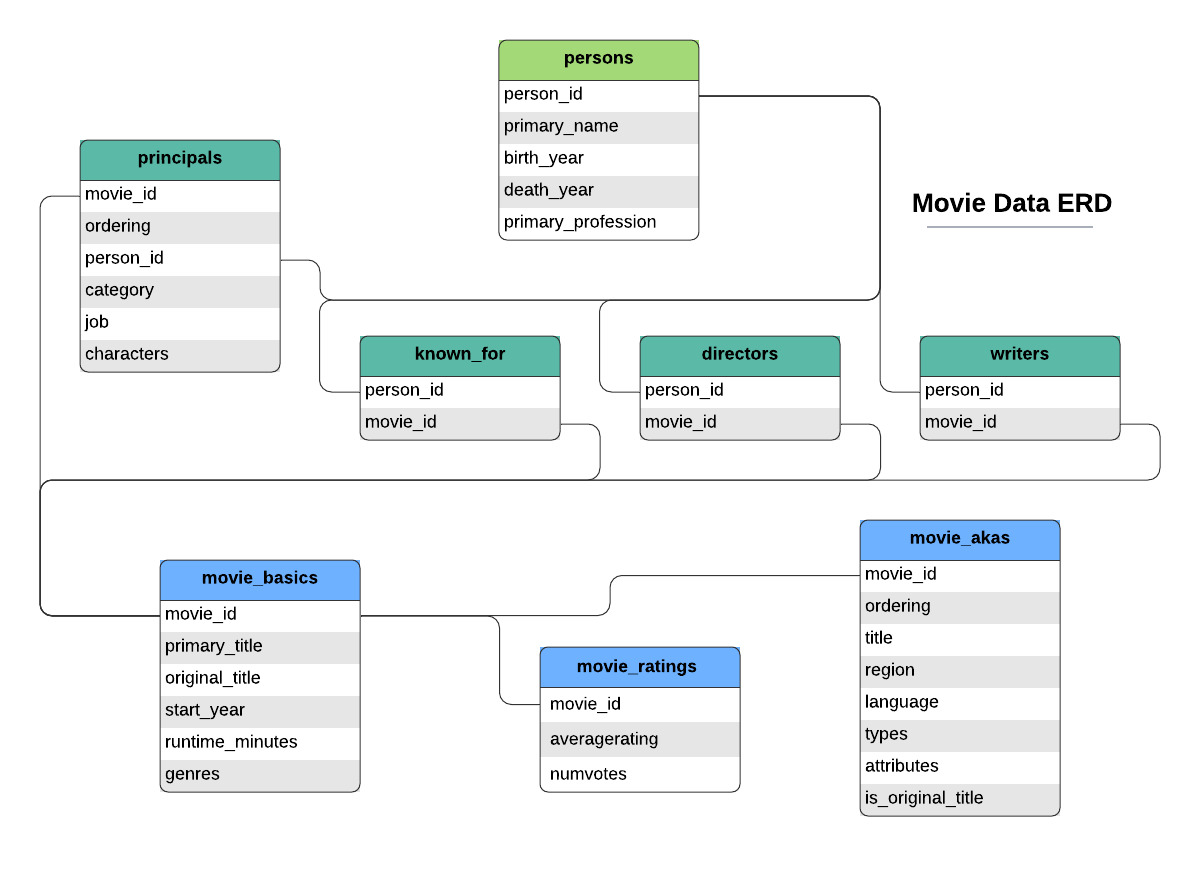

Use the Pandas library to read the contents of one of the CSV datasets provided named 'bom.movie_gross.csv.
The same will be done for the other datasets provided. In order to be able to see all the data that we 
are working with.

In [52]:

# Read the CSV file into a DataFrame
Bom_movie_gross = pd.read_csv("C:\\Users\\willi\\OneDrive\\Documents\\GitHub\\dsc-phase-1-project-v2-4\\zippedData\\bom.movie_gross.csv\\bom.movie_gross.csv")

print(Bom_movie_gross)


                                            title      studio  domestic_gross  \
0                                     Toy Story 3          BV     415000000.0   
1                      Alice in Wonderland (2010)          BV     334200000.0   
2     Harry Potter and the Deathly Hallows Part 1          WB     296000000.0   
3                                       Inception          WB     292600000.0   
4                             Shrek Forever After        P/DW     238700000.0   
...                                           ...         ...             ...   
3382                                    The Quake       Magn.          6200.0   
3383                  Edward II (2018 re-release)          FM          4800.0   
3384                                     El Pacto        Sony          2500.0   
3385                                     The Swan  Synergetic          2400.0   
3386                            An Actor Prepares       Grav.          1700.0   

     foreign_gross  year  


In [53]:
Bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Now that we have seen all the data we are working with it is time to begin analyzing the data 
in the IMDB database using SQL

In [75]:
#Read the tmdb_movies DataFrame
tmdb_movies = pd.read_csv(r"C:\Users\willi\OneDrive\Documents\GitHub\dsc-phase-1-project-v2-4\zippedData\tmdb.movies.csv\tmdb.movies.csv")

# Display the first few rows of the DataFrame
print(tmdb_movies)

       Unnamed: 0            genre_ids      id original_language  \
0               0      [12, 14, 10751]   12444                en   
1               1  [14, 12, 16, 10751]   10191                en   
2               2        [12, 28, 878]   10138                en   
3               3      [16, 35, 10751]     862                en   
4               4        [28, 878, 12]   27205                en   
...           ...                  ...     ...               ...   
26512       26512             [27, 18]  488143                en   
26513       26513             [18, 53]  485975                en   
26514       26514         [14, 28, 12]  381231                en   
26515       26515      [10751, 12, 28]  366854                en   
26516       26516             [53, 27]  309885                en   

                                     original_title  popularity release_date  \
0      Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      

In [76]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [42]:
#Would like to understand the structure of our IMDB database in order to grasp the 
#organization of its tables.
schema_df5 = pd.read_sql("""

SELECT *
    FROM sqlite_master

""", conn)

schema_df5

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


The morst important tables for us in this database are movie_basics and movie_ratings
so lets take a deeper look at them

In [50]:
movie_basics = pd.read_sql("""

SELECT *
FROM movie_basics

""", conn)
print(movie_basics)


         movie_id                                primary_title  \
0       tt0063540                                    Sunghursh   
1       tt0066787              One Day Before the Rainy Season   
2       tt0069049                   The Other Side of the Wind   
3       tt0069204                              Sabse Bada Sukh   
4       tt0100275                     The Wandering Soap Opera   
...           ...                                          ...   
146139  tt9916538                          Kuambil Lagi Hatiku   
146140  tt9916622  Rodolpho Teóphilo - O Legado de um Pioneiro   
146141  tt9916706                              Dankyavar Danka   
146142  tt9916730                                       6 Gunn   
146143  tt9916754               Chico Albuquerque - Revelações   

                                     original_title  start_year  \
0                                         Sunghursh        2013   
1                                   Ashad Ka Ek Din        2019   
2     

In [49]:
movie_ratings = pd.read_sql("""

SELECT *
FROM movie_ratings

""", conn)
print(movie_ratings)

         movie_id  averagerating  numvotes
0      tt10356526            8.3        31
1      tt10384606            8.9       559
2       tt1042974            6.4        20
3       tt1043726            4.2     50352
4       tt1060240            6.5        21
...           ...            ...       ...
73851   tt9805820            8.1        25
73852   tt9844256            7.5        24
73853   tt9851050            4.7        14
73854   tt9886934            7.0         5
73855   tt9894098            6.3       128

[73856 rows x 3 columns]


After seeing the data from these two tables the next step is to merge the averagerating column to 
the table movie_basics. This is because it offers us important information on how the movies are being
perceived

In [57]:

#Merging movie_basics to movie_ratings
merged_df = movie_basics.merge(movie_ratings, on='movie_id', how='inner')
print(merged_df)


        movie_id                    primary_title              original_title  \
0      tt0063540                        Sunghursh                   Sunghursh   
1      tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2      tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3      tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4      tt0100275         The Wandering Soap Opera       La Telenovela Errante   
...          ...                              ...                         ...   
73851  tt9913084                 Diabolik sono io            Diabolik sono io   
73852  tt9914286                Sokagin Çocuklari           Sokagin Çocuklari   
73853  tt9914642                        Albatross                   Albatross   
73854  tt9914942       La vida sense la Sara Amat  La vida sense la Sara Amat   
73855  tt9916160                       Drømmeland                  Drømmeland   

       start_year  runtime_

In [58]:
# Print information about the merged DataFrame
print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB
None


# DATA CLEANING

Before Data Analysis is done we have to ensure that all the data we are working with is accurate, has no duplicates or any missing data. 


In [59]:
#Cleaning the IM.DB Database
# Handle missing values
merged_df['runtime_minutes'].fillna(merged_df['runtime_minutes'].median(), inplace=True)
merged_df['genres'].fillna('Unknown', inplace=True)

# Remove duplicate records
merged_df.drop_duplicates(inplace=True)

# Convert data types
merged_df['start_year'] = pd.to_datetime(merged_df['start_year'], format='%Y')  
merged_df['numvotes'] = merged_df['numvotes'].astype('int64')  

# Display info after cleaning
print(merged_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   movie_id         73856 non-null  object        
 1   primary_title    73856 non-null  object        
 2   original_title   73856 non-null  object        
 3   start_year       73856 non-null  datetime64[ns]
 4   runtime_minutes  73856 non-null  float64       
 5   genres           73856 non-null  object        
 6   averagerating    73856 non-null  float64       
 7   numvotes         73856 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.5+ MB
None


In [60]:
#Cleaning the bom.movie_gross.csv
# Drop rows with missing values in the 'studio' column
Bom_movie_gross.dropna(subset=['studio'], inplace=True)

# Fill missing values in 'domestic_gross' with the median
Bom_movie_gross['domestic_gross'].fillna(Bom_movie_gross['domestic_gross'].median(), inplace=True)

# Convert 'foreign_gross' to numeric and fill missing values with 0
Bom_movie_gross['foreign_gross'] = pd.to_numeric(Bom_movie_gross['foreign_gross'], errors='coerce').fillna(0)



In [62]:
Bom_movie_gross.to_csv('cleaned_bom_movie_gross.csv', index=False)
pd.read_csv('cleaned_bom_movie_gross.csv')


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3377,The Quake,Magn.,6200.0,0.0,2018
3378,Edward II (2018 re-release),FM,4800.0,0.0,2018
3379,El Pacto,Sony,2500.0,0.0,2018
3380,The Swan,Synergetic,2400.0,0.0,2018
